In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib import cm
import numpy as np
import random
import json
from IPython.display import clear_output
import os

# from result_plots.ProfilingBased.common.common import read_data, get_metric_mapping
# from result_plots.ProfilingBased.common.process_data_from_solver import get_mean_from_iterations, normalize_error_result, get_ensemble_error
# from result_plots.ProfilingBased.common.plot import get_result_from_pkl, get_x_position, get_xtick_position, \
#                                                 plot_raw, get_gain, gain_over_strawman, consolidate_gain_over_strawman

# from result_plots.ProfilingBased.common.heatmap import plot_heatmap

## plotting function

In [2]:
# plot profiling result (mean value) for all metrics with different rows
def plot_result(data, algo = 'cm', row = 1, widths = [4096, 8192, 16384, 32768, 65536, 131072],
               level = 1, metric = 'hh', isSaveFig=False, isShowByte=False, output_dir_name='profiler', legends = ['a', 'b', 'c']):
    big_fontsize = 22
    small_fontsize = 22
    
    x_labels = []
    if isShowByte:
        for w in widths:
            x_labels.append(str(w))
    else:
        for w in widths:
            x_labels.append(str(int(w / 1024)))

    fig = plt.figure(figsize = (6, 6))

    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    
    marker_list = ['o', '*', 'x', 'v', '^']

    # Creating plot
    for d, label, marker in zip(data, legends, marker_list):
        bp = ax.plot(widths, d, label=f'{label}', marker=marker)

    # plt.axvline(x = 8192, color = 'darkgreen', linestyle='--')

    ax.set_xticks(widths)
    if isShowByte:
        ax.set_xticklabels(x_labels, fontsize=small_fontsize, rotation = 45)
        plt.xlabel("Width (BYTE)", fontsize=small_fontsize)
    else:
        ax.set_xticklabels(x_labels, fontsize=small_fontsize)
        plt.xlabel("Width (KB)", fontsize=small_fontsize)
        
#     ax.set_yscale('log')

    plt.yticks(fontsize=small_fontsize)    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    title_str = ''
    ylabel_str = ''
    ylabel_fontsize = small_fontsize
    if metric == 'hh':
        title_str = f'{algo.upper()}: Heavy Hitter'
        ylabel_str = "Average Relative Error (%)"
    elif metric == 'entropy':
        title_str = f'{algo.upper()}: Entropy'
        ylabel_str = "Relative Error (%)"
    elif metric == 'card':
        title_str = f'{algo.upper()}: Cardinality'
        ylabel_str = "Relative Error (%)"
    elif metric == 'fsd':
        title_str = f'{algo.upper()}: Flow Size Distribution'
        ylabel_str = "Weighted Mean Relative Difference"
        # ylabel_fontsize = 20
    elif metric == 'change_det':
        title_str = f'{algo.upper()}: Change Detection'
        ylabel_str = "Average Relative Error (%)"

    if level > 1:
        title_str += f', Level: {level}'
    # plt.title(title_str, fontsize=18)
    plt.ylabel(ylabel_str, fontsize=ylabel_fontsize)

    # legend_patch = []
    # legend_patch.append(mpatches.Patch(color='crimson', label='Best algorithms'))
    # legend_patch.append(mpatches.Patch(color='royalblue', label='General algorithm'))
    # plt.legend(handles=legend_patch, fontsize=16)

    plt.legend(fontsize=small_fontsize, frameon=False, ncol=2) # , loc="upper right"
    # plt.legend(fontsize=small_fontsize, frameon=False, ncol=2, loc=(0,0.8)) # for HLL log

    if isSaveFig:
        output_dir = f'{output_dir_name}/normal/' # normal, log
        # create directory if it doesn't exist
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        plt.savefig(f'{output_dir}/{algo.upper()}_{metric}_normal.pdf', format='pdf', bbox_inches='tight')

    # show plot
    plt.show()
        
# plot_result(mean_data)

### Set training set config

In [3]:
algo_metric_mapping = {}
algo_metric_mapping['hll'] = ['card']
algo_metric_mapping['cm'] = ['hh', 'fsd']
algo_metric_mapping['cs'] = ['hh', 'fsd']
algo_metric_mapping['ll'] = ['card']
algo_metric_mapping['lc'] = ['card']
algo_metric_mapping['mrb'] = ['card']
algo_metric_mapping['mrac'] = ['fsd']

# algo_metric_mapping['cs'] = ['fsd']

# algo_metric_mapping['hll'] = ['card']

# algo_metric_mapping['univmon'] = ['hh', 'card']

metric_algo_mapping = {}
for algo in algo_metric_mapping:
    for metric in algo_metric_mapping[algo]:
        if metric not in metric_algo_mapping:
            metric_algo_mapping[metric] = [algo]
        else:
            metric_algo_mapping[metric].append(algo)

metric_algo_mapping

{'card': ['hll', 'll', 'lc', 'mrb'],
 'hh': ['cm', 'cs'],
 'fsd': ['cm', 'cs', 'mrac']}

In [11]:
widths = [4096, 8192, 16384, 32768, 65536]
# widths = [4096, 8192, 16384, 32768]
row = 1

isSaveFig = False
isShowByte = False

---
## number of flows

In [5]:
base_dir = './results/'

# directory_list = ['profiler_zipf_1.1_numberofFlow_0.1x_srcip', 'profiler_zipf_1.1_numberofFlow_1x_srcip', 'profiler_zipf_1.1_numberofFlow_10x_srcip']
directory_list = ['profiler_zipf_1.1_numberofFlow_0.1x_srcip', 'profiler_zipf_1.1_numberofFlow_0.5x_srcip', 'profiler_zipf_1.1_numberofFlow_1x_srcip', 
                  'profiler_zipf_1.1_numberofFlow_2x_srcip', 'profiler_zipf_1.1_numberofFlow_4x_srcip', 'profiler_zipf_1.1_numberofFlow_10x_srcip']

# legends = ['0.1x', '1x', '10x', ]
legends = ['0.1x', '0.5x', '1x', '2x', '4x', ]

output_dir_name = 'figures/plot_profiles_comparison/num_of_flows/'

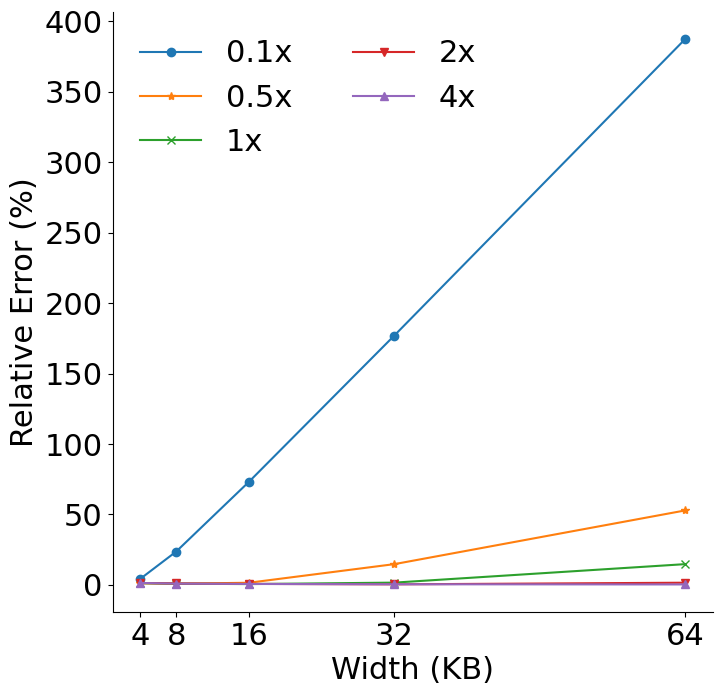

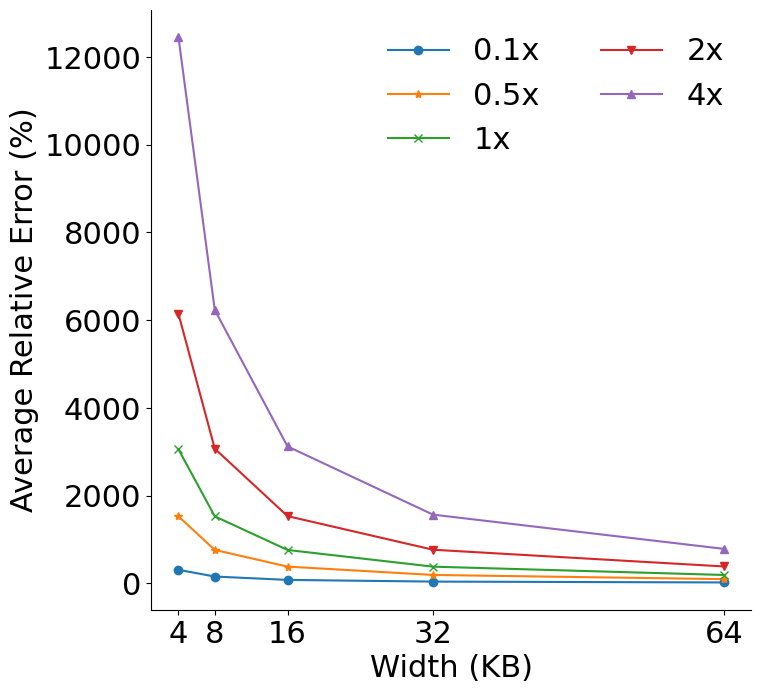

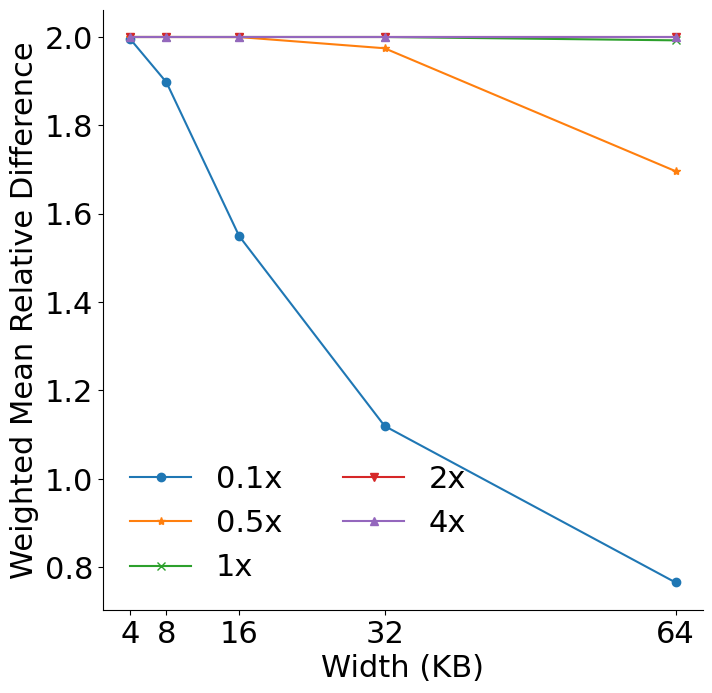

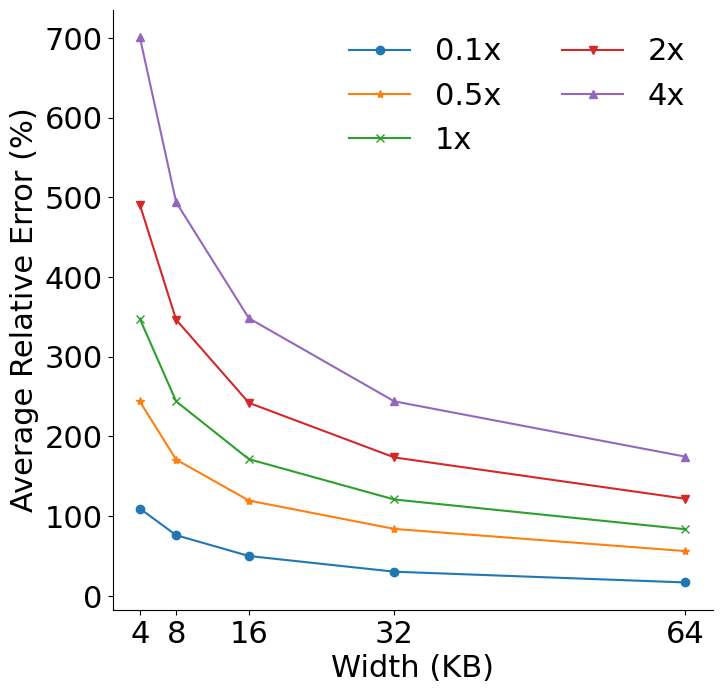

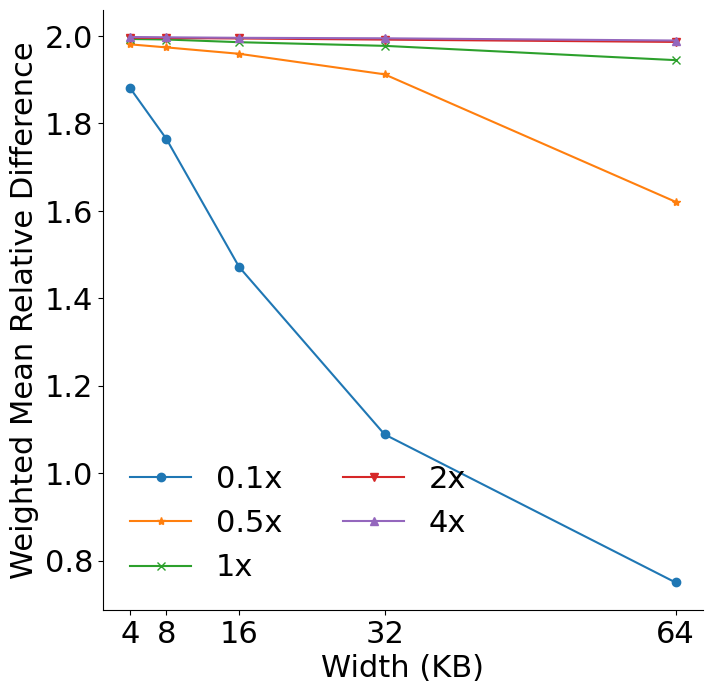

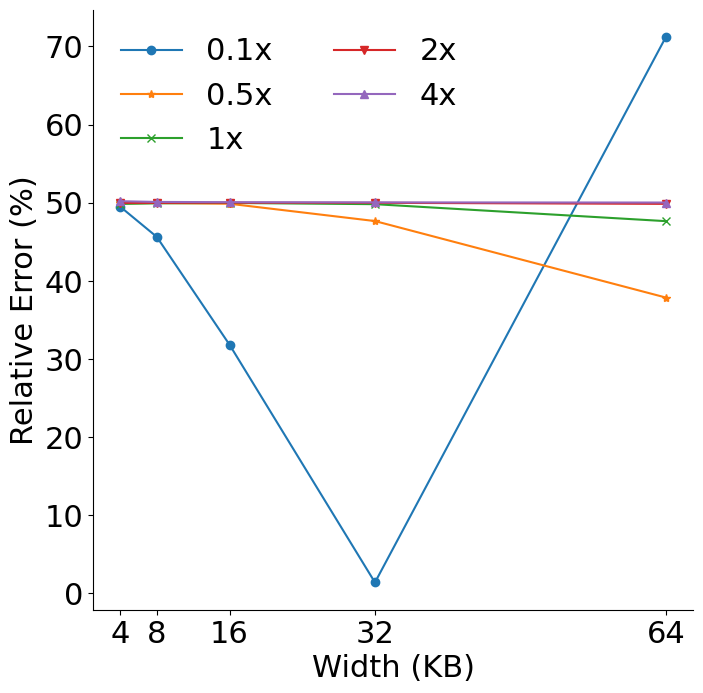

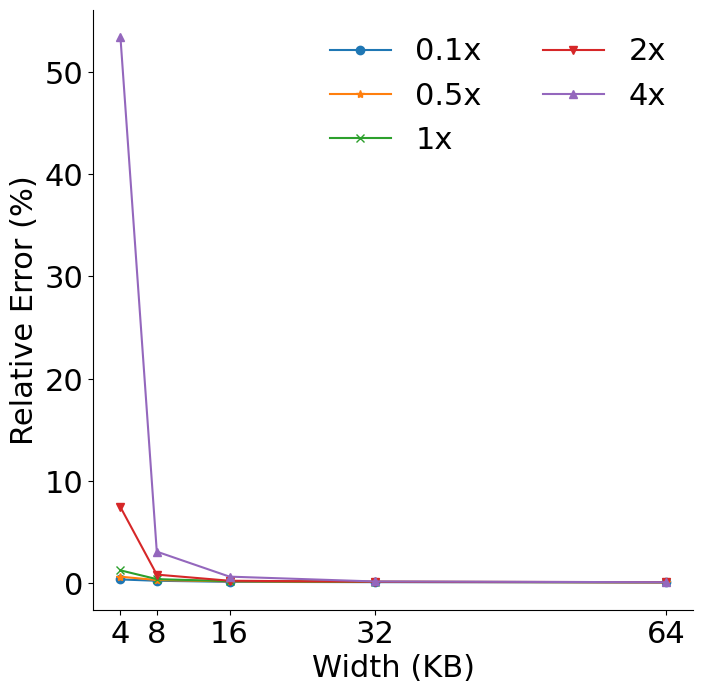

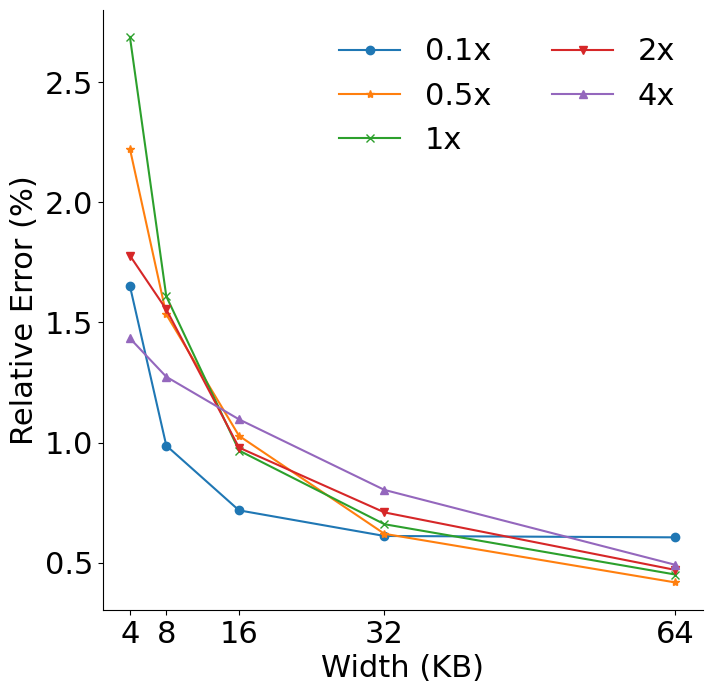

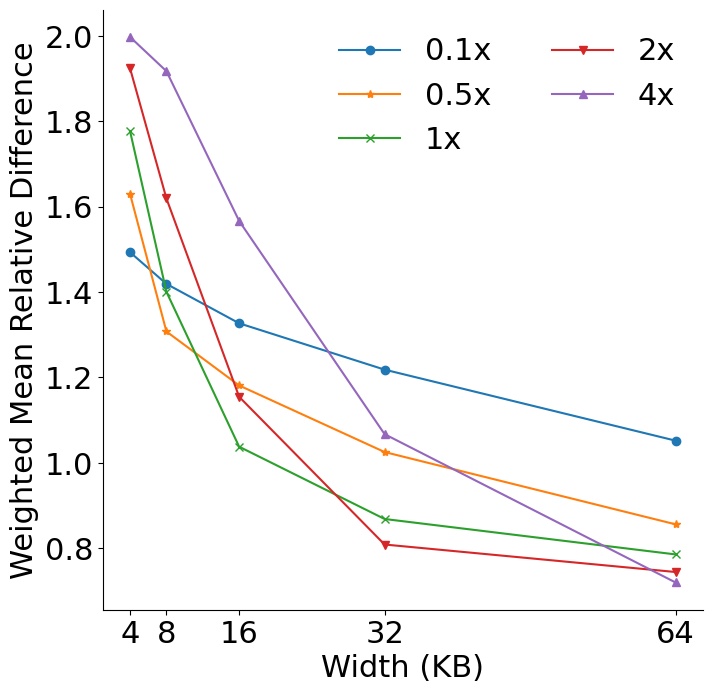

In [6]:
# iterate over all sketch algorithms
for algo in algo_metric_mapping:
    # iterate over all metrics under given sketch
    for metric in algo_metric_mapping[algo]:
        data = []
        # iterate over all different types of profiles
        for directory in directory_list:
            filename = base_dir + directory + '/' + algo + '_level_1_result.json'
            level = 1
            if algo == 'mrac' or algo == 'mrb':
                filename = base_dir + directory + '/' + algo + '_level_8_result.json'
                level = 8
            elif algo == 'univmon':
                filename = base_dir + directory + '/' + algo + '_level_16_result.json'
                level = 16
            # print(filename)
            with open(filename) as f:
                js = json.load(f)
                ll = []
                for width in widths:
                    # print(algo, metric, width)
                    # print(np.mean(js[metric]['1'][f'{width}']))
                    ll.append(np.mean(js[metric][f'{row}'][f'{int(width / level)}']))
                data.append(ll)
        # print(data)
        plot_result(data, algo, row, widths, level, metric, isSaveFig, isShowByte, output_dir_name, legends)

---
## number of packets

In [7]:
base_dir = './results/'

directory_list = ['profiler_zipf_1.1_numberofPkt_0.3x_srcip', 'profiler_zipf_1.1_numberofPkt_0.6x_srcip', 'profiler_zipf_1.1_numberofPkt_1x_srcip']

legends = ['0.3x', '0.6x', '1x', ]

output_dir_name = 'figures/plot_profiles_comparison/num_of_packets/'

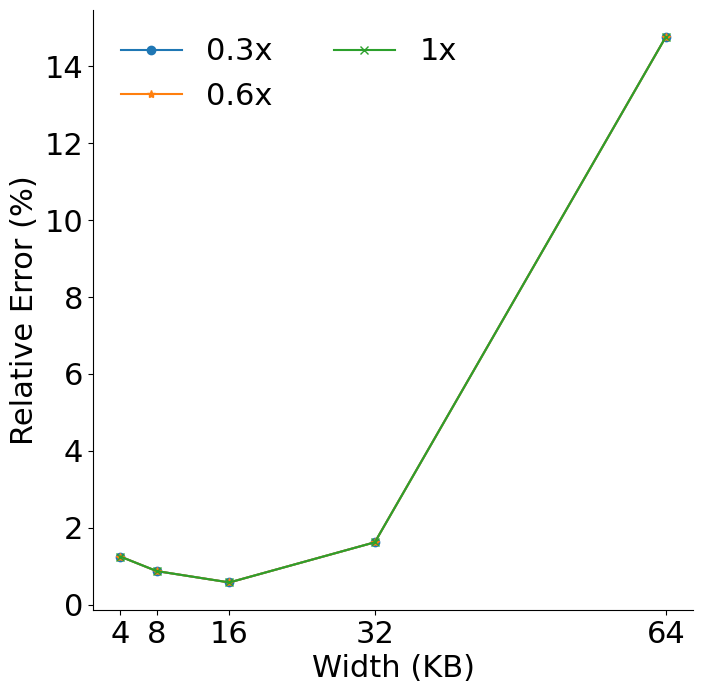

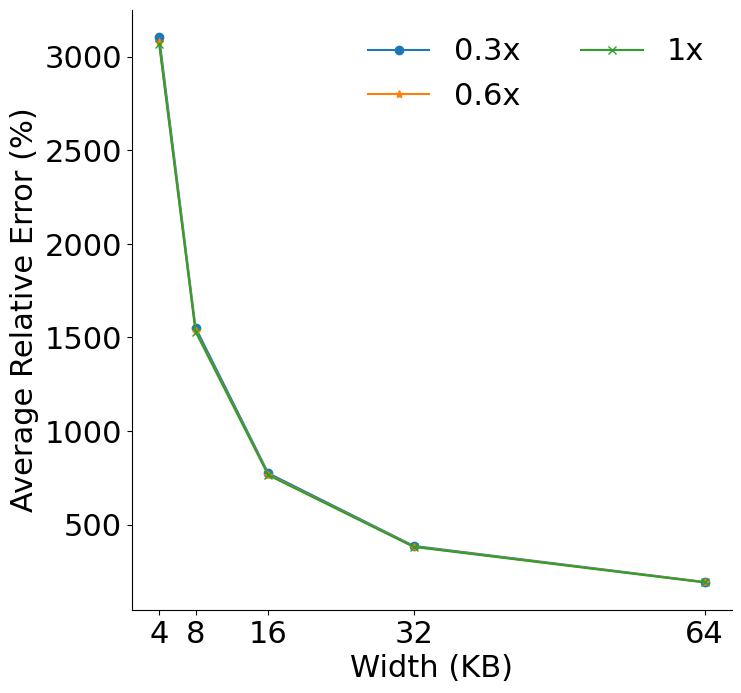

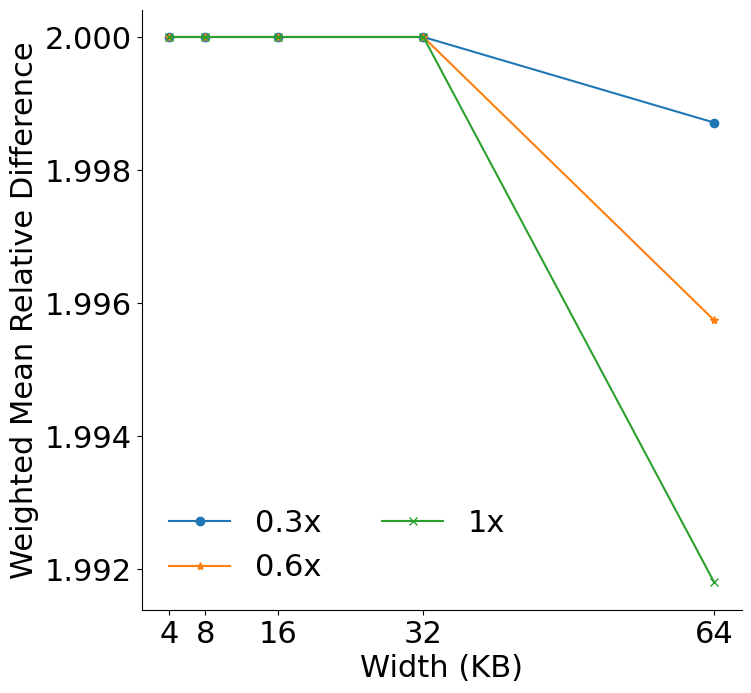

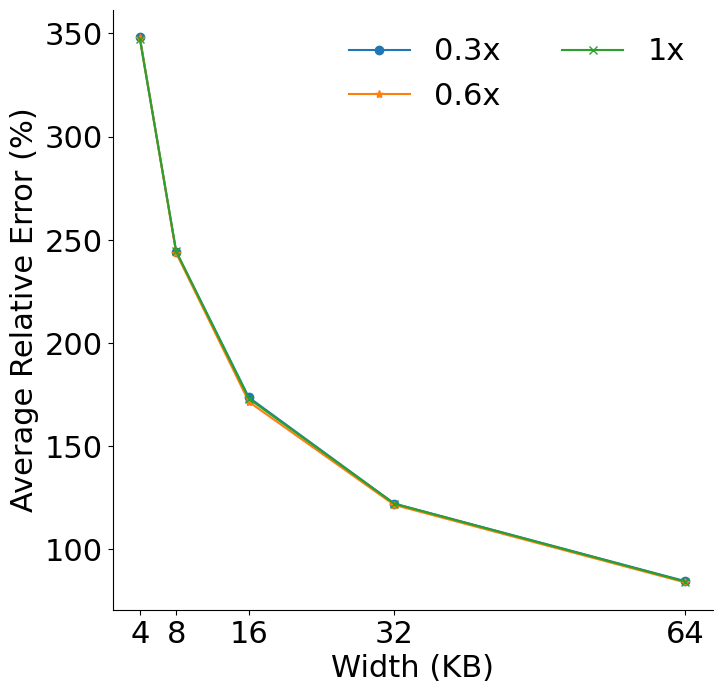

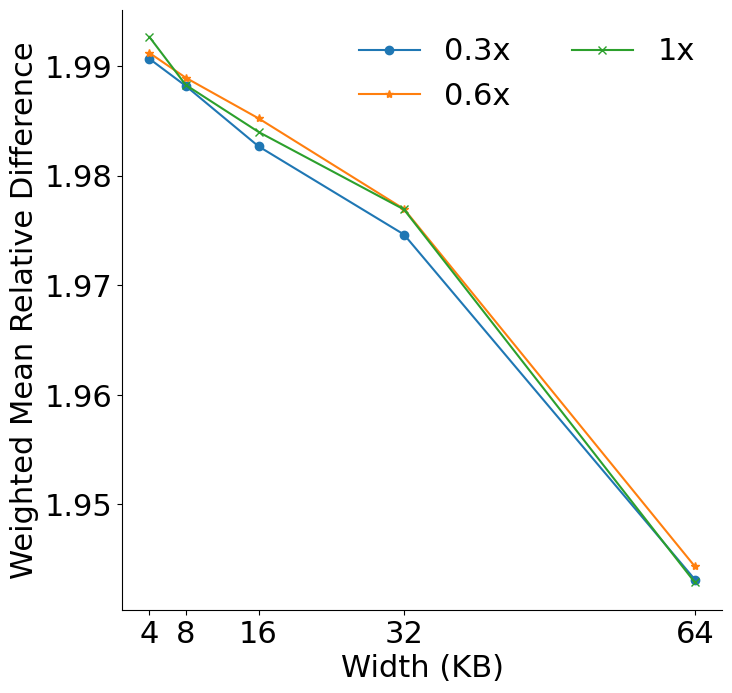

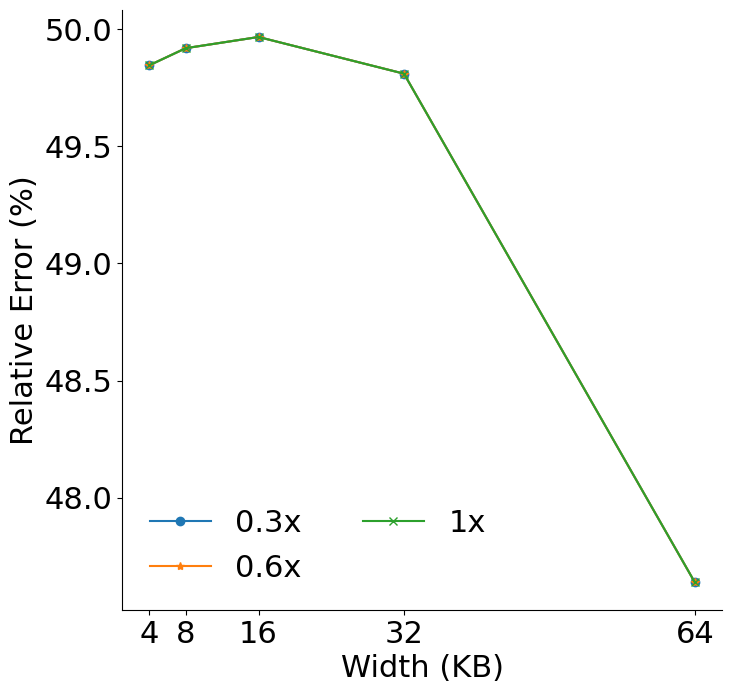

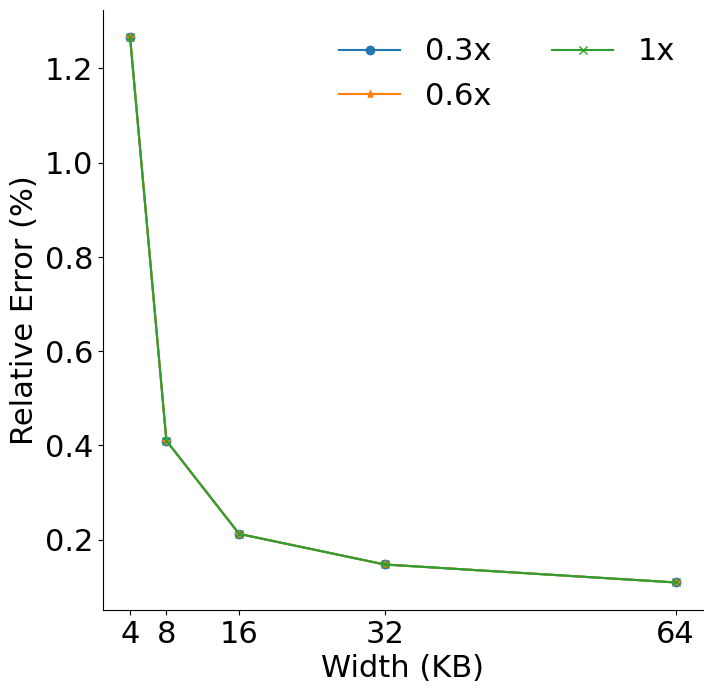

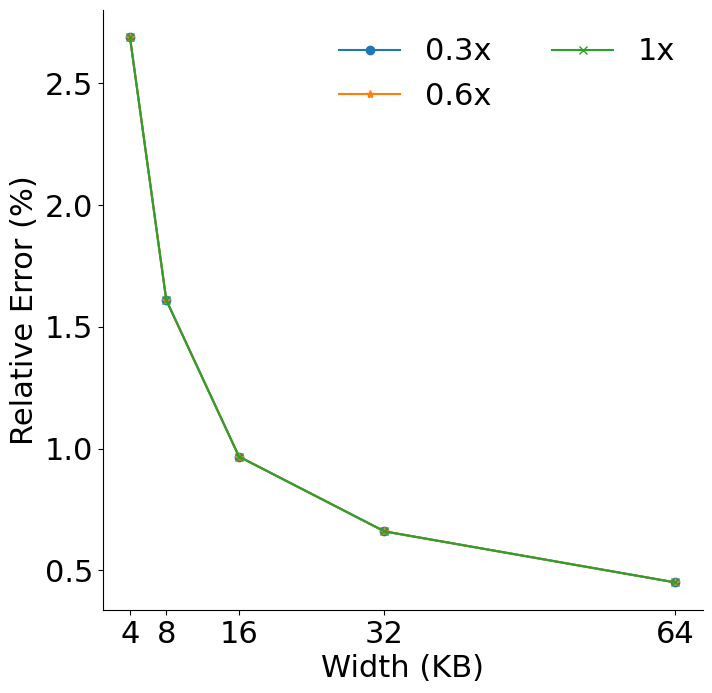

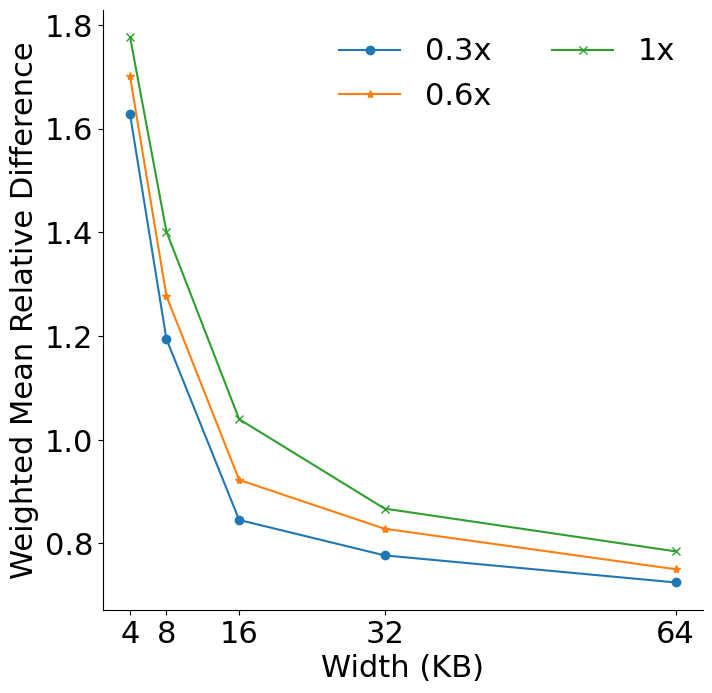

In [8]:
# iterate over all sketch algorithms
for algo in algo_metric_mapping:
    # iterate over all metrics under given sketch
    for metric in algo_metric_mapping[algo]:
        data = []
        # iterate over all different types of profiles
        for directory in directory_list:
            filename = base_dir + directory + '/' + algo + '_level_1_result.json'
            level = 1
            if algo == 'mrac' or algo == 'mrb':
                filename = base_dir + directory + '/' + algo + '_level_8_result.json'
                level = 8
            elif algo == 'univmon':
                filename = base_dir + directory + '/' + algo + '_level_16_result.json'
                level = 16
            # print(filename)
            with open(filename) as f:
                js = json.load(f)
                ll = []
                for width in widths:
                    # print(algo, metric, width)
                    # print(np.mean(js[metric]['1'][f'{width}']))
                    ll.append(np.mean(js[metric][f'{row}'][f'{int(width / level)}']))
                data.append(ll)
        # print(data)
        plot_result(data, algo, row, widths, level, metric, isSaveFig, isShowByte, output_dir_name, legends)

---
## different distributions

In [9]:
base_dir = './results/'

directory_list = ['profiler_caida_srcip', 'profiler_uniform_fixFlowPkt_srcip', 'profiler_zipf_1.1_fixFlowPkt_srcip']

legends = ['caida', 'uniform', 'zipf', ]

output_dir_name = 'figures/plot_profiles_comparison/diff_distributions/'

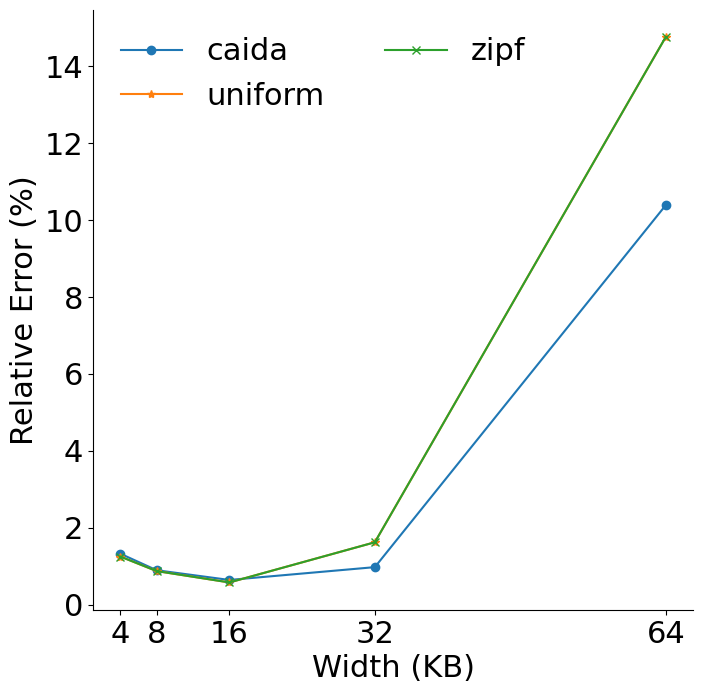

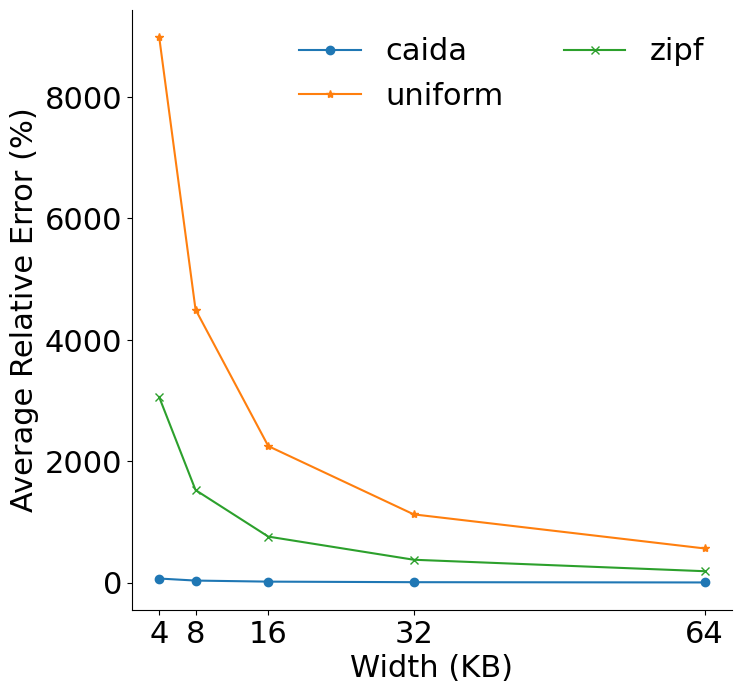

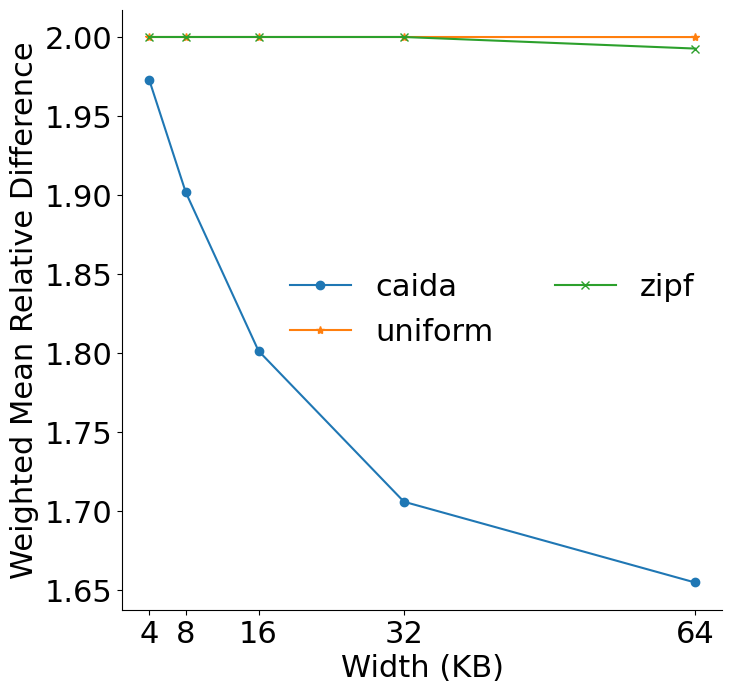

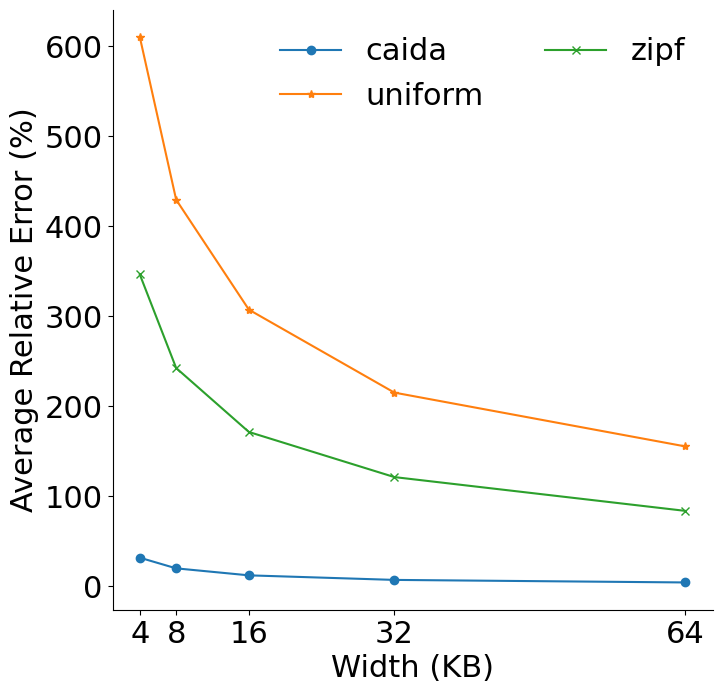

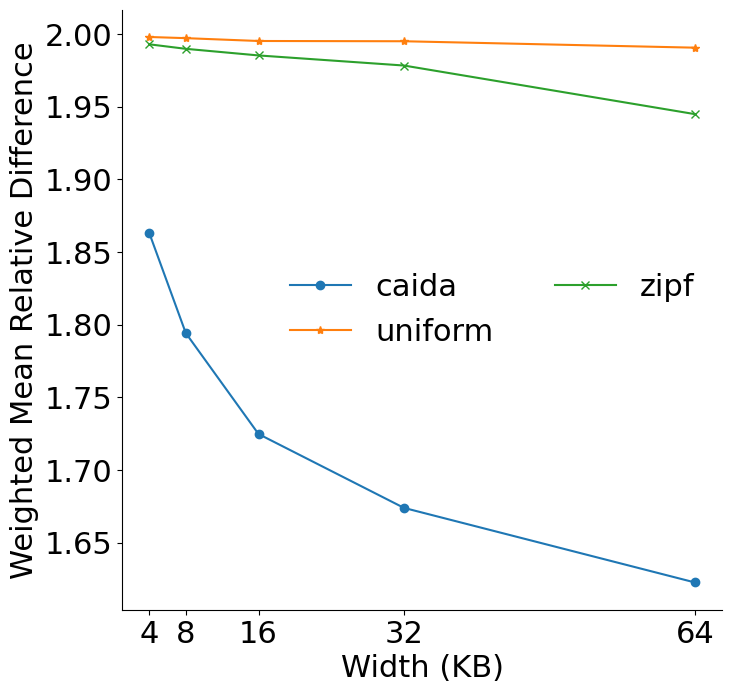

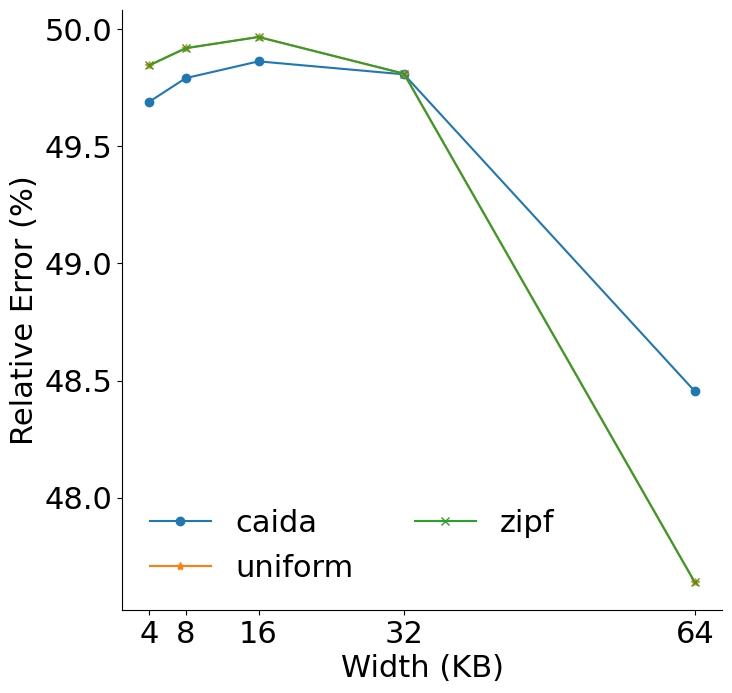

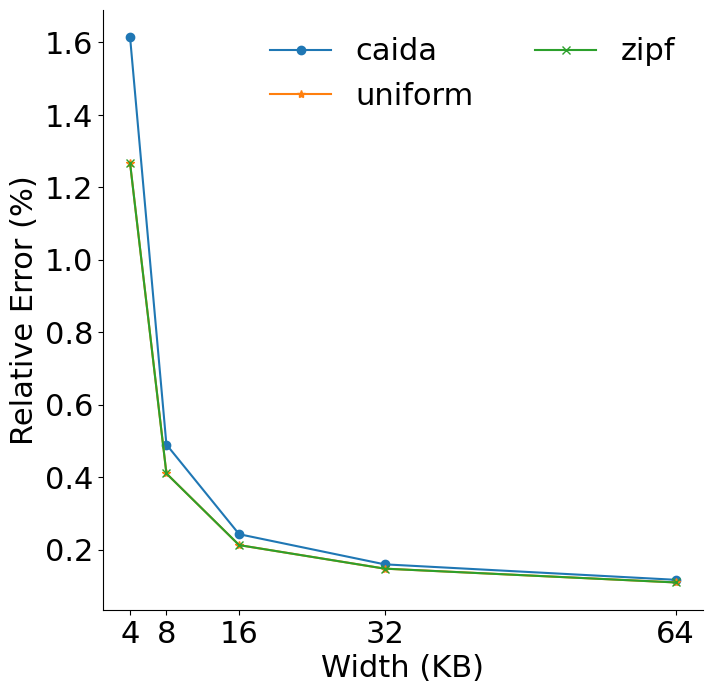

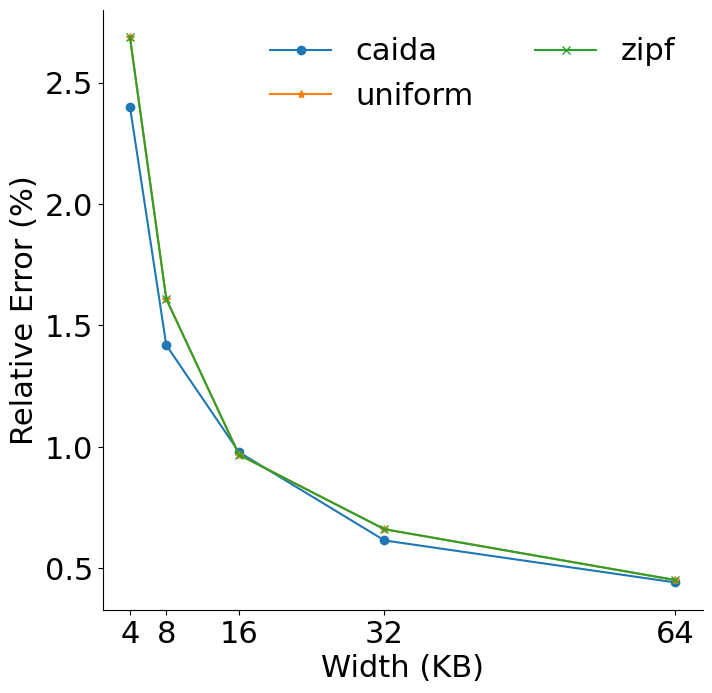

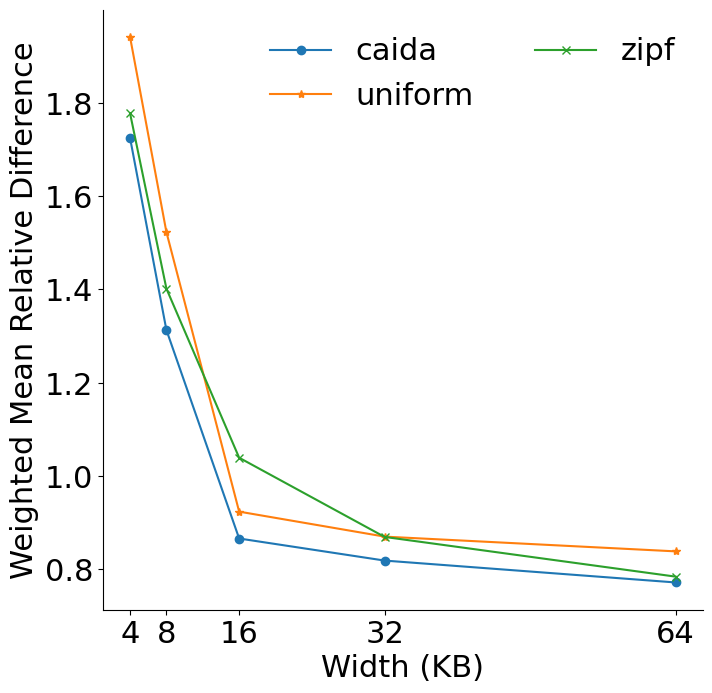

In [10]:
# iterate over all sketch algorithms
for algo in algo_metric_mapping:
    # iterate over all metrics under given sketch
    for metric in algo_metric_mapping[algo]:
        data = []
        # iterate over all different types of profiles
        for directory in directory_list:
            filename = base_dir + directory + '/' + algo + '_level_1_result.json'
            level = 1
            if algo == 'mrac' or algo == 'mrb':
                filename = base_dir + directory + '/' + algo + '_level_8_result.json'
                level = 8
            elif algo == 'univmon':
                filename = base_dir + directory + '/' + algo + '_level_16_result.json'
                level = 16
            # print(filename)
            with open(filename) as f:
                js = json.load(f)
                ll = []
                for width in widths:
                    # print(algo, metric, width)
                    # print(np.mean(js[metric]['1'][f'{width}']))
                    ll.append(np.mean(js[metric][f'{row}'][f'{int(width / level)}']))
                data.append(ll)
        # print(data)
        plot_result(data, algo, row, widths, level, metric, isSaveFig, isShowByte, output_dir_name, legends)